In [1]:
# Get value of PUIDATA environment variable. If it's not set, set it.
import os
puidata = os.getenv("PUIDATA")
if puidata is None:
    puidata = os.environ["PUIDATA"] = "%s/PUIdata" % os.getenv("HOME")
print("PUIDATA=" + puidata)

PUIDATA=/nfshome/aaw329/PUIdata


In [2]:
# Obtain dataset from NYC OpenData (https://data.cityofnewyork.us/Environment/Current-Reservoir-Levels/zkky-n5j3)
import pandas as pd
res_lvls = pd.read_csv("https://data.cityofnewyork.us/api/views/zkky-n5j3/rows.csv")
res_lvls.head(7) # Print the first 7 rows

,Date,Ashokan East Storage,Ashokan East Elevation,Ashokan West Storage,Ashokan West Elevation,Schoharie Storage,Schoharie Elevation,Rondout Storage,Rondout Elevation,Neversink Storage,Neversink Elevation,Pepacton Storage,Pepacton Elevation,Cannonsville Storage,Cannonsville Elevation
0,11/01/2017,65.36,577.86,36.34,577.89,12.92,1109.86,47.26,835.85,30.74,1430.03,116.60,1264.45,47.69,1112.87
1,11/02/2017,64.95,577.58,36.82,578.59,13.28,1111.05,47.32,835.94,30.68,1429.90,116.87,1264.61,48.20,1113.33
2,11/03/2017,64.36,577.31,37.18,579.14,13.56,1111.97,47.22,835.79,30.72,1429.99,117.08,1264.74,48.66,1113.74
3,11/04/2017,63.71,576.94,37.49,579.56,13.78,1112.73,47.28,835.88,30.83,1430.22,117.15,1264.78,49.05,1114.09
4,11/05/2017,63.15,576.52,37.78,579.92,13.98,1113.39,47.36,836.00,30.94,1430.47,117.11,1264.76,49.35,1114.36
5,11/06/2017,62.53,576.14,38.04,580.24,14.19,1114.04,47.46,836.14,31.07,1430.75,117.23,1264.83,49.75,1114.72
6,11/07/2017,61.92,575.75,38.28,580.52,14.38,1114.66,47.50,836.21,31.19,1431.01,117.20,1264.81,50.13,1115.06


In [4]:
# Select only the third and fourth columns
res_lvls = res_lvls[[2,4]]

In [5]:
res_lvls.head(7)

,Ashokan East Elevation,Ashokan West Elevation
0,577.86,577.89
1,577.58,578.59
2,577.31,579.14
3,576.94,579.56
4,576.52,579.92
5,576.14,580.24
6,575.75,580.52


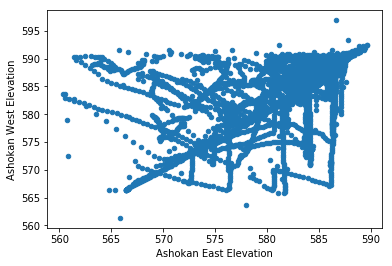

In [9]:
%matplotlib inline
res_lvls.plot(x="Ashokan East Elevation", y="Ashokan West Elevation", kind="scatter")

Figure 1: scatter plot of elevation of Ashokan East and Ashokan West reservors. 